# Using the Tile toolbox

The tile toolbox is used to retrieve images from a tile server, and caching them. 

The tiles can be retrieved with the bounding box (lower left and upper right) coordinates either in WGS84 (degrees) or in ITM (meters). 

To use the toolbox, the user can either define the tile server as a datasource (see below) or supply the url directly. 
First, we import the toolkit. 

In [1]:
from hera import toolkitHome

Initializing the logging for debugging. 

In [2]:
from hera.utils.logging import initialize_logging, with_logger
initialize_logging(
     with_logger("hera.measurements.GIS.raster.tiles.TilesToolkit", handlers=['console'], level='DEBUG', propagate=False)
)

Then, we get the toolkit toolbox. In this example,we use the temporary 'test' project. It has to be changed to 
the specific project. 

In [3]:
tiles = toolkitHome.getToolkit(toolkitName=toolkitHome.GIS_TILES,projectName="test")

 EXECUTION: helpers.py/execution(50) Directory is not given, tries to load from default or using the current directory
 EXECUTION: helpers.py/execution(50) Using /home/expradmin/Projects/raptor/notebooks


## Adding server as a datasource 

While it is possible to use the url directly, it is more comfortable to add the server as a toolkit datasource once to the project, and then access it by name. 
In this example, we add the server 'localServer' to be the local tile server. We use overwrite=True to refrain from errors in this example. 

In [4]:
from hera.datalayer import datatypes
tiles.addDataSource(dataSourceName="localServer",resource= "http://127.0.0.1/resat_tiles/{z}/{x}/{y}.png",dataFormat=datatypes.STRING,overwrite=True);

## Listing datasources 
The existing datasources can be listed using the getDataSourceTable function

In [5]:
tiles.getDataSourceTable()

,datasourceName,version,toolkit,dataFormat,resource
0,localServer,"[0, 0, 1]",Tiles,string,http://127.0.0.1/resat_tiles/{z}/{x}/{y}.png


The getDataSourceTable also gets filters (field=value) to query the datasource table. 

## Getting an image

First, lets get an image of tel aviv without storing it in the DB. 

First, define the coordinates of the bounding box (here the example is in WGS84)

In [6]:
lly = 32.07302
llx = 34.790643
lowerLeft= [lly,llx]

ury = 32.09302
urx = 34.810643
upperRight = [ury,urx]

Next, we get the image from the server and its extent. In this example, the extent is in ITM. 

In [41]:
img,extent = tiles.getImageFromCorners(lowerLeft,upperRight,16,tileServer="localServer",inputCRS=tiles.WSG84,outputCRS=tiles.WSG84)

 INFO    : tiles.py/getImageFromCorners(92) ------- Start
 INFO    : tiles.py/getImageFromCorners(101) Converting the input coordinates from EPSG 4326 to WGS84 (EPSG:4326)
 INFO    : tiles.py/_getImageFromTiles(175) ------- Start
 DEBUG   : tiles.py/_getImageFromTiles(180) The number of tiles in x: 4 and y: 5.
 DEBUG   : tiles.py/_getImageFromTiles(183) Squaring the image to be of equal height and width
 INFO    : tiles.py/_getImageFromTiles(193) Getting the Image  (tiles 5x5) from http://127.0.0.1/resat_tiles/{z}/{x}/{y}.png
 INFO    : tiles.py/_getImageFromTiles(202) Got the image extent: [32.06861069132687, 34.7882080078125] and [32.09653629470278, 34.815673828125]
 INFO    : tiles.py/getImageFromCorners(111) Converting the output coordinates from WGS84 (EPSG:4326) to EPSG 4326


Finally, we plot the image. 

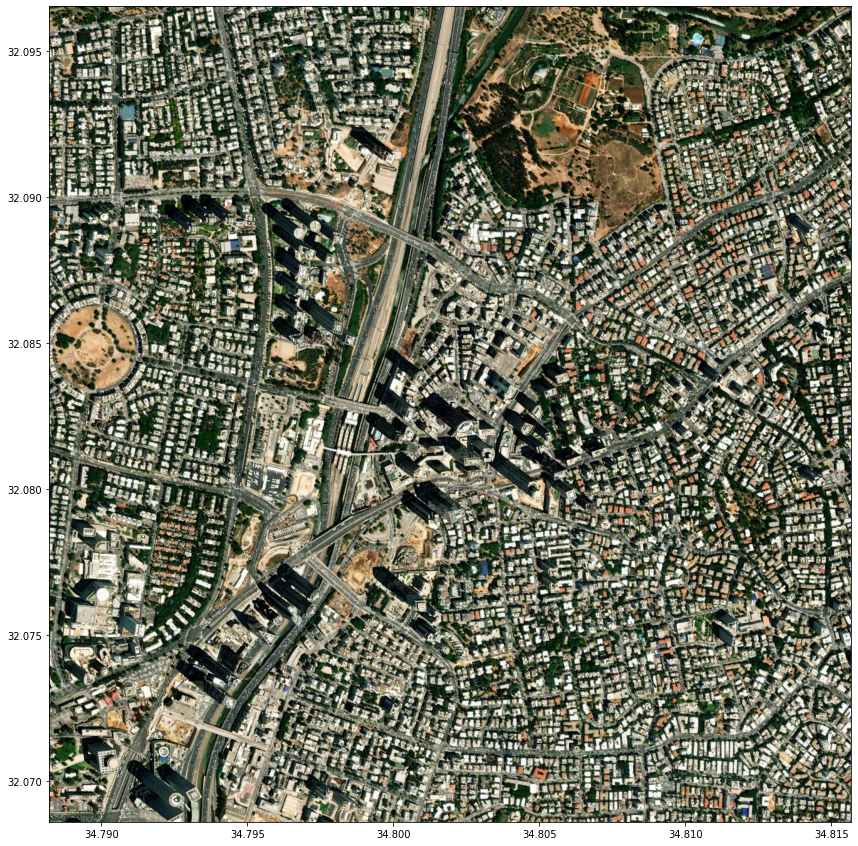

In [42]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(1,1,figsize=(15,15))
plt.imshow(img,extent=extent )

It is also possible to plot the image using the toolkit itself

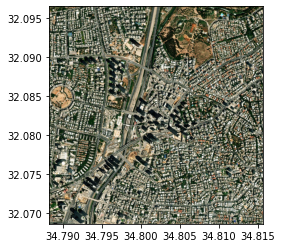

In [43]:
tiles.presentation.plot(img,extent)

In [44]:
extent[1]-extent[0]

0.0274658203125

In [45]:
extent[3]-extent[2]

0.027925603375912544